<a id='top'></a>

# Homework 3: Normals and More Simulation
***

**Name**: Muntaha Pasha

***

This assignment is due on Canvas by **MIDNIGHT on Friday October 25**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | 

---

In [25]:
import pandas as pd
import numpy as np
import math
import random
from scipy import stats
import matplotlib.pylab as plt
%matplotlib inline

<br>

---
<a id='p1'></a>
[Back to top](#top)

<img src="https://media.daysoftheyear.com/20171223112636/hedgehog-day1.jpg" style="width: 500px;"/>


### [25 points] Problem 1

Suppose you are modeling the probability of observing various levels of cuteness in hedgehogs you encounter.  Let $X$ be a random variable representing the observed cuteness, which is *obviously* nonnegative and has units of deci*awws*. You decide to use the following pdf for $X$:

$$
f(x) = \begin{cases}
         c \ x \ e^{\left(-\frac{x^2}{6}\right)} & 0 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $c$ is some normalizing constant.

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid probability density function. Then, make a plot of the probability density function for hedgehog cuteness, $f(x)$. Be sure to label your plot and axes!

**SOURCES USED**

1 - (linspace in Python) https://pythonspot.com/matplotlib-scatterplot/

**Part A (Solution):** 

We know we need to pick some $c$ so that our function $f(x)$ integrates to 1.

What we can do is take the integral of $f(x)$ from $0$ to $\infty$.

$$\int_0^\infty c x e^{(\frac{-x^2}{6})} = 1$$

Then we can use a u-substitution, where $u=x^2$, and $du=2xdx$

$$\frac{c}{2} \int_0^\infty e^{(-u/6)}du$$

Now, we can take the integral, and we are left with...

$$-\frac{6c}{2} e^{(-u/6)} \bigg|_0^\infty$$

Plug in $\infty$ and $0$ to the equation.

$$-3c \cdot (e^{-\infty/6}-e^{0/6})$$

Solve, and then we get...

$$-3c \cdot (0-1) = 3c = 1$$

So we know that c is...

$$c = \frac{1}{3} \checkmark$$

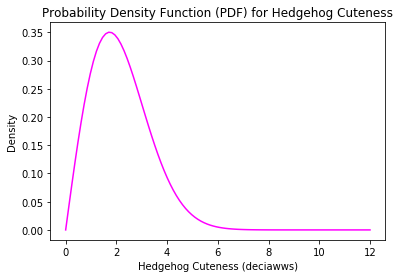

In [26]:
#First we are going to write a function to simulate this.
def function(varX):
    #With the variable passed in, feed it through the function.
    #The 1/3 in front is what we solved for above.
    x=(1/3)*varX*(np.exp(-(varX**2)/6))
    #Then return our variable.
    return x
#Now we can use linspace to specify we want 100 samples of them from 0 to 12 (x-axis)
m = np.linspace(0,12,100)
#Then we plot!
plt.plot(m, function(m), color="magenta")
plt.title("Probability Density Function (PDF) for Hedgehog Cuteness")
plt.xlabel("Hedgehog Cuteness (deciawws)")
plt.ylabel("Density");

**Part B**: Compute *by hand* the cumulative density (cdf) function $F(x)$ for $X$.

Now, we will start our integration at $0$, and go to $x$.

We will have $F(x)$ look like the following.

$$F(x) = \int_0^x f(y) \cdot dy$$

We will take our function from Part A, and input it in for $f(y)$.

$$\int_0^x \frac{1}{3} y e^{(-y^2/6)} dy$$

Now we can use our u-substitution again and set $u = y^2$, and $du = 2ydy$. Using this, our integral becomes...

$$\int_0^{x^2} \frac{1}{6} e^{(-u/6)} du$$

We take the constants out, solve our integral, and get the following.

$$-(\frac{6}{6}) \cdot e^{(-u/6)} \bigg|_0^{x^2}$$

Which becomes...

$$-1 \cdot (e^{(-x^2/6)} - e^0)$$

So the final answer is then...

$$F(x) = 1 - e^{(-x^2/6)} \checkmark$$

**Part C:**  Use the cdf you derived in **Part B** to calculate the median ($\tilde{x}$) cuteness of all hedgehogs.

We know that the median is referring to the middle of our probability mass. So we can do the following. From Part A, and Part B, we have already solved for $F(x)$ and $c$, and we can use them to solve for $F(\tilde{x})$. We will replace the $x$ in $F(x)$ with the new $\tilde{x}$.

$$F(\tilde{x}) = \frac{1}{3} = 1 - e^{(-\tilde{x}^2/6)}$$

So we can set $1 - e^{(-\tilde{x}^2/6)}$ equal to $\frac{1}{3}$.

$$\frac{1}{3} = e^{(-\tilde{x}^2/6)}$$

We can take the log of both sides.

$$-\log{3} = \frac{-\tilde{x}^2}{6}$$

Multiply $6$ over to the other side.

$$6 \log{3} = \tilde{x}^2$$

Finally, take the square root of both sides to solve for $\tilde{x}$.

$$\tilde{x} = \sqrt{6 \log{3}} \approx 2.567 $$

So we know that...

$$\tilde{x} \approx 2.57 \checkmark$$

In [27]:
#We can test this and see if it actually gives us the result we got.
res = (np.sqrt(6*(np.log(3))))
print("The median cuteness of all hedgehogs is... {}".format(res))

The median cuteness of all hedgehogs is... 2.567425506613319


**Part D**: It is a well-known fact that any hedgehog whose cuteness exceeds 3 deciawws is **totes adorbz**. Use the cdf you computed in **Part B** to find the probability that any arbitrary hedgehog that you observe is totes adorbz.

**PART D (Solution):**

We know that $X$ is the variable for cuteness, so we are looking at Probability that the cuteness exceeds 3. We can write that as the following. $P(X \geq 3)$

The probability of finding $P(X \geq 3)$ is to find $1$ minus the probability of $(X \leq 3)$.

$$P(X \geq 3) = 1 - P(X \leq 3)$$

We can write this with the CDF we computed in Part B.

$$P(X \geq 3) = 1 - (1 - e^{(-3^2/6)})$$

This leaves us with $e^{(-3/2)}$.

$$e^{(-3/2)} \approx 0.223 \checkmark$$

In [28]:
res = (np.exp(-9/6))
print("The probability that any arbitrary hedgehog is totes adorbz is...{}".format(res))

The probability that any arbitrary hedgehog is totes adorbz is...0.22313016014842982


**Part E:** You have been painstakingly collecting data on hedgehogs all over town, and the cuteness is damn near overwhelming. Suppose you sample 6 hedgehogs, and the cuteness of any given hedgehog is independent of the cuteness of all other hedgehogs. What is the probability that at least 2 but not all of them are totes adorbz?

**PART E (Solution):**

We want to find the probability at least 2, but not all are totes adorbz. We can express it like so.

$$P(X\geq 2)$$  

We can then set this equal to the following, because we know $P(X \geq 2)$ is going to be 1 minus the sum of $x$ choose $6$ times the probability we found above just now in Part D.

$$1 -\sum_{x=0}^{2}(_6^x) (0.22)^x(1-0.22)^{6-x}$$

Once we solve this out, we get that...

$$P(X \geq 2) \approx 0.875 \checkmark$$

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [25 points] Problem 2 - Monte Carlo Estimation of Definite Integrals

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used frequently in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a relatively simple integral. 

**Part A.**  Let $X$ be a random variable representing how delicious a pie you bake is, as measured by the **Deliciousness Index** (DI).  Suppose the probability density function for $X$ is described by the raised cosine probability density function:

$$
f(x) = \begin{cases}
         \dfrac{1}{\pi}\left(\cos{(x)} + 1\right) & 0 \leq x \leq \pi \\
         0                           & \text{otherwise}
         \end{cases}
$$

A Deliciousness Index of $\pi$ is the most delicious pie you can ever hope to create, and a DI of $0$ is the most disgusting pie you have ever tasted.  

Compute **by hand**, the integral of $f(x)$ for $0 \leq x \leq \dfrac{\pi}{2}$.  Write a sentence or two to interpret your result physically, in the context of this problem set-up.

**PART A (Solution):**

We need to integrate from $0$ to $\frac{\pi}{2}$.

$$\int_0^{\pi/2} \dfrac{1}{\pi}\cdot(\cos(x)+1)\cdot dx$$

The integral of $(\cos(x)+1)$ is just $(\sin(x)+x)$. So we are left with the following after simplifying the integral.

$$\dfrac{1}{\pi}(\sin(x) + x)\bigg|_0^{\frac{\pi}{2}}$$

We can now evaluate it with $0$ and $\frac{\pi}{2}$.

$$\frac{1}{\pi} \cdot ( \sin(\frac{\pi}{2}) + \frac{\pi}{2}) - (\sin(0) + 0) )$$

This simplifies down to $\frac{1}{\pi} \cdot (1 + \frac{\pi}{2})$

Multiply in the $\frac{1}{\pi}$, and we end up with...

$$\frac{1}{\pi} + \frac{1}{2} \approx 0.8183 \checkmark$$

$\underline{\text{Conclusions:}}$

So based on this, $0.8183$ is the probability that the pie we are baking would have have a DI $\leq \frac{\pi}{2}$, which means the pie is so-so and could be better!

$$P(DI \leq \frac{\pi}{2}) \approx 0.8183$$

**Part B.** Suppose we sample a random variable $X$ from $U(0,\frac{\pi}{2})$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\frac{\pi}{2}] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

**PART B (Solution):**

The value that the ratio of points that fall under the curve $f(x)$ to the total points sampled estimates the proportion of the area in the square, or box formed under the curve of $f(x)$.

**Part C.** How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral?  If you need inspiration, check out the in-class notebook on Stochastic Simulation (#4), specifically, the exercise where we estimated $\pi$!

**PART C (Solution):**

If we want the area just under the curve, but only are given a proportion of the full area, we can multiply the proportion by the total area we have, in this case $\frac{\pi}{2}$, to get the area under the curve.

**Part D.** Complete the function `integrate` below to compute an approximation to the definition integral $\int_0^{\text{ub}} f(x)dx$.  Your function should take as arguments:
1. `num_samples` -- the number of points to sample,
2. `ub` -- a number between $0$ and $\pi$ that is the upper bound of the integral, and
3. `isPlot` -- a Boolean flag for whether or not to display a plot of the results.

Your function should return an approximation of the definite integral by sampling $X$ from $U(0,\text{ub})$ and $Y$ from $U(0,1)$. For each random draw $(X,Y)$, define the random variable $Z$ that represents whether or not the sampled $Y$ value is less than $f(X)$ for the corresponding $X$ value.

Your function should perform three tasks: 

1. return the estimate of the value of the integral,
2. return the sample variance of the random variable $Z$ being simulated, using the np.var function, and
3. if `isPlot` is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

**SOURCES USED**

1 - (Variance in Python) https://www.geeksforgeeks.org/numpy-var-in-python/

2 - (Scatter Plots) https://pythonspot.com/matplotlib-scatterplot/

In [29]:
#First I am going to define my cosine function, or f(x)
def cos_func(x):
    #It will simulate exactly what f(x) does. Takes 1/pi * (cos(x)+1)
    cos_res = ((1/np.pi) * (np.cos(x)+1))
    #Return the result of that.
    return cos_res

# GIVEN CODE - Do not change the inputs/outputs or your code will fail unit tests and auto-grading!
def integrate(num_samples, ub, isPlot=False):
    #Setting isPlot to False unless specified True. If True, then we will plot.
    #-----------------------------------------
    # your code goes here!  replace this junk:
    #Defining my Y variable, to hold U(0, 1)
    Y = np.random.uniform(0, 1, num_samples)
    #Defining my X variable to hold U(0, ub)
    X = np.random.uniform(0, ub, num_samples)
    #Putting X through my cosine function defined above and storing it in a variable.
    funcVal = cos_func(X)
    #This is where we check if the sample Y value is less than our f(x) value.
    randVar =  Y < funcVal
    #Now sum up the random variables
    sumRandVar = np.sum(randVar)
    #Here we take the sum multiply by the sum of the random variables, and divide by total number of samples.
    estimate = ub * sumRandVar / num_samples
    #Now we calculate the variance!
    sample_var = np.var(randVar)
    #Is isPlot is set to True, then we wanna graph it!
    if isPlot:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7)) 
        xVal = np.arange(0, np.pi, np.pi/100)
        #Plot our functions
        ax.plot(xVal, cos_func(xVal), color="black")
        #Make a scatter plot.
        ax.scatter(X[Y <= funcVal], Y[Y <= funcVal], color = "magenta")
        #Make another scatter plot.
        ax.scatter(X[Y > funcVal], Y[Y > funcVal], color = "lime")
        ax.set_title("Plot of f(x) and locations of points (X,Y)")
    return estimate, sample_var
    #-----------------------------------------

**Part E.** Write your own small unit tests!

First, what should your `integrate` function output if you plug in `ub=0`? Set that as `int_0_to_0` below.

Second, what should your `integrate` function output if you plug in `ub=`$\pi$? Set that as `int_0_to_pi` below.

Then, you can execute the cell below to run two sanity checks. Write out **in math** (like, a definite integral) what each of these two tests is checking and **why** that is a reasonable sanity check.

If these two assertions run without fail, then things seem to be working okay. Note that the upper endpoint test is stochastic, so if it fails, try running it a few times. If it fails a lot, then things are probably going wrong.

In [30]:
#Explanation below the Cell.
int_0_to_0  = 0 # fill this in!
int_0_to_pi = 1 # this one too!


#---------------------------------------
# DO NOT EDIT THIS CELL BELOW HERE
#---------------------------------------
assert integrate(1000, 0, False)[0]==int_0_to_0, "Error: lower endpoint test failing"
assert math.isclose(integrate(10000, np.pi, False)[0],int_0_to_pi,abs_tol=0.03), "Error: upper endpoint test failing"

**PART E (Solution):**

The first $\text{int_0_to_0}$ is basically talking about the integral of $f(x) dx$ from $0$ to $0$, and that should be $0$. So the first one is correct $\checkmark$.

The second $\text{int_0_to_pi}$ is talking about the integral of $f(x) dx$ from $0$ to $\pi$, which has to be $1$, because the whole of the pdf is from $0$ to $1$ so the integration will give us $1$ because it'll be normalized $\checkmark$.

**Part F.** Run your simulation with `isPlot=True` and `ub=`$\frac{\pi}{2}$ for 1,000 samples so we can see your plot. Then, run your simulation (with `isPlot=False`) with at least 10,000 samples and estimate the value of the given integral. Be sure to leave your cells evaluated for the graders! Does your estimate agree with the exact value of the integral you computed in **Part A**? 

**SOURCES USED**

1 - (Error Calculation) https://sciencenotes.org/calculate-percent-error/


(0.8215264789137309, 0.249471)


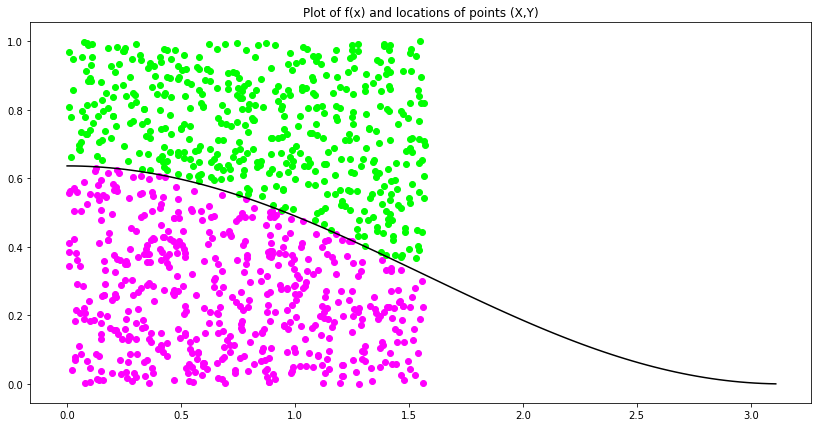

In [31]:
firstSim = integrate(num_samples=1000, ub=(np.pi/2), isPlot=True)
print(firstSim)

In [32]:
secondSim = output = integrate(num_samples=10000, ub=(np.pi*0.5), isPlot=False)
print(secondSim)
#Error Calculations
error=((0.8141-0.8183)/0.8183)
percentError=error*100
print("Relative Error is about...{}".format(error))
print("Which is {}%".format(percentError))

(0.813201258381718, 0.24968670999999995)
Relative Error is about...-0.005132591958939242
Which is -0.5132591958939242%


**PART F (Solution):**

The output I get when running my second simulation is very very close! I'm getting $\approx{0.8141}$ and in my Part A I got $\approx{0.8183}$.

To calculate the relative error, we can use the following formula.

$$\text{Error} = \frac{\text{measured - actual}}{\text{actual}}$$

Using the value I got in my secondSim with the value I got in my Part A, I plug those in.

$$\text{Error} = \frac{0.8141 - 0.8183}{0.8183} \approx -0.513 \text{%} \checkmark$$

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
### [25 points] Problem 3 - Mmmm... Donuts...

<img src="http://astrokentico.s3.amazonaws.com/rojakdaily/media/1nichoras/homer%20simpson%20krispy%20kreme/main.jpg?ext=.jpg" style="width:300px;"/>

You bring many donuts (or _doughnuts_, if you're into that) to work to share with your coworkers at the Boulder Nuclear Power Planet. But due to the high levels of radiation there, they must be inspected for safety. In particular, if the mean level of radiation in a sample from your batch of donuts is above [195 mSv (millisievert)](#rad), then they are deemed unsafe and you must throw the whole batch away.

You know that historically donuts at the power plant have, on average, 180 mSv of radiation, with a standard deviation of 65 mSv. To test the donut radiation levels, you take the donut receipt and pick every fifth donut off it, and sample the radiation levels of those donuts. You end up sampling the radiation levels of 49 donuts out of the batch. Assume that your donuts follow the same distribution as that of the historical donuts.

**Part A.** What is the probability that a donut batch is deemed unsafe?  You should at the very least set up and justify your calculation by hand (in Markdown/Mathjax), before executing any calculations in Python.

**SOURCES USED**

1 - (Understanding Central Limit Theorem) http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability12.html

2 - (More on CLT) https://www.dummies.com/education/math/statistics/how-the-central-limit-theorem-is-used-in-statistics/

**PART A (Solution):**

We can let $X$ represent the random variable which stands for the radiation levels in the batch of donuts.

Using the Central Limit Theorem, we have the following formula.

$$\bar{X} \sim N(\mu, \frac{\sigma^2}{n})$$

Now we can fill in our variables. We know that $\mu = 180$ mSv, $\sigma = 65$ mSv, and $n=49$ donuts.

$$\bar{X} \sim N(180, \frac{65^2}{49})$$

Now we can go ahead and set up our full equation.
$$\begin{align}
    P(\bar{X} > 195) &= P\left(Z > \dfrac{195-180}{\frac{65}{\sqrt{49}}}\right) \\
\end{align}
$$

Once we solve, we get down to the following.

$$P(\bar{X} > 195) = P(Z > 1.62)$$

As always, we know that we can find the probability of $Z > 1.62$ by finding $1$ minus the probability of $Z \leq 1.62$.

$$P(Z > 1.62) = 1 - P(Z \leq 1.62) = 1 - \Phi(1.62)$$

We can find $\Phi(1.62)$ which is $\approx 0.9473$.

$$1 - 0.9473 \approx 0.0527 \checkmark$$

In [33]:
#Testing it via Code.
denominator = (65/7)
numeric = ((195-180)/denominator)
cdfVal = (1 - stats.norm.cdf(numeric))
print("The answer is...{}, that's close to my answer!".format(cdfVal))

print("---------------------------")

#Another way to test it!
n = 49
mu = 180
sigma = 65
centralLimTheorem = (1 - stats.norm.cdf((195-mu)/(sigma/np.sqrt(n))))
print("Another way to derive the same answer {}".format(centralLimTheorem))

The answer is...0.05311371489000205, that's close to my answer!
---------------------------
Another way to derive the same answer 0.05311371489000205


**Part B.** Yikes! Seems like those donuts might be dangerous, but you really do not want to throw away donuts that frequently, so you propose to store the donuts in a lead-lined donut box. But lead also is not very good for your health, so you are motivated to use the least amount of lead possible. What is the maximum mean amount of radiation $\mu$ for our donuts to have such that the probability that we will throw donuts out due to safety concerns is at most 0.02?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

**SOURCES USED**

1 - (Python ppf function) https://stackoverflow.com/questions/20626994/how-to-calculate-the-inverse-of-the-normal-cumulative-distribution-function-in-p

**PART B (Solution):**

We want to know the maximum mean amount of radiation ($\mu$) for the donuts to have a probability of throwing our donuts out at most being $0.02$. We can express that as the following. 

$$P(\bar{X} > 195) < 0.02$$

The Central Limit Theorem then tells us that

$$\begin{align}
    P\left(Z \leq \dfrac{195 - 180}{\frac{65}{\sqrt{49}}}\right) =0.02 \\
\end{align}
$$

And we want to find the critical value of $Z$, let's denote that at $Z_{crit}$ so that...

$$\begin{align}
    1 - P\left(Z \leq \dfrac{195 - 180}{\frac{65}{\sqrt{49}}}\right) = 1 - 0.02 = 0.98 \\
\end{align}
$$

Let's use Python now to do this.

In [38]:
Z_critical = stats.norm.ppf(0.98)
print("The critical value is... {}".format(Z_critical))

The critical value is... 2.0537489106318225


The next part is to solve for $\mu$.

$$Z_{crit} = \frac{195 - \mu}{\frac{\sigma}{\sqrt{49}}}$$

Bring $\mu$ to the other side.

$$\mu = 195 - Z_{crit} \cdot \frac{\sigma}{\sqrt{49}}$$

We found the value of $Z_{crit}$ above, so we can plug that in and simplify our expression down.

$$\mu = 195 - 2.05375 \cdot \frac{65}{\sqrt{49}}$$

Solve it out, and we finally get that $\mu$ is...

$$\mu = 175.93 \text{mSv} \checkmark$$

In [39]:
mu_res = 195 - (stats.norm.ppf(0.98) * (65/7))
print("The result for mu is...{}".format(mu_res))

The result for mu is...175.92947440127594


**Part C.**  Your supervisor at the plant decides that serving up donuts in a lead-lined box is a bad idea. Fair enough.

But she is still imposing the requirement that the probability of a batch of donuts being rejected must be less than 0.02. However, she knows a differnat bakery that might be the solution. At Johnny's Super Consistent Baked Goods Emporium all the donuts are exactly the same in size, which means they are closer to being exactly the same in radiation content (less deviation). Suppose the mean and sample size are at their original values of $\mu = 180$ mSv and $n = 49$ mSv. What is the largest standard deviation to satisfy this requirement?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

**PART C (Solution):**

Like Part B, we can look at it like this. Our $Z_{crit}$ (critical value) will be the same still, but we need to find now the standard deviation, $\sigma$.

$$Z = \frac{195 - 180}{\frac{\sigma}{\sqrt{49}}}$$

Simplify.

$$Z = \frac{15}{\frac{\sigma}{7}}$$

Get 15 onto the other side.

$$15 = Z \cdot \frac{\sigma}{7}$$

Isolate Sigma on one side.

$$\frac{15 \cdot 7}{Z} = \sigma$$

We know what $Z$ is from the critical value we found of it.

$$\frac{105}{2.05375} = \sigma$$

Now we can solve.

$$\sigma = 51.12 \text{mSv}$$

In [42]:
findStdDev = (15*7)/(stats.norm.ppf(0.98))
print("The result is...{}".format(findStdDev))

The result is...51.126016163143056


**Part D:** Since donuts of differant diameters absorb differant amounts of radiation it is easy to model the standard deviation of radiation content in terms of the standard deviation in donut size. Assume the function $RD$ below takes in the standard deviation in millimeters of donut diameter $(\sigma_d)$, and gives the radiation deviation in mSv.

$\begin{align}
    RD(\sigma_d) = \frac{5^{\sigma_d} \times 1mSv}{6mm}
\end{align}$

Johnny's bakes according to the following $\textit{"mathmatically"}$ correct donut size:

<img src="http://www.conquermaths.com/news/images/decinfo.jpg" style="width:300px;"/>

So they strive for a donut diameter of 72 - 82 mm, with less than 5mm of standard deviation. However, we're not taking their word for it. We've taken a sample of 36 donuts from Johnny's to determine if their low standard deviation satisfies our requirement of less than $0.02$ chance that we throw away our donuts. The observed standard deviation in donut size was 2.8mm. Assume that the mean radiation remains unchanged from the other donuts. Do Johnny's donuts satisfy our requirement of less than $0.02$ chance that we throw them away? 

**PART D (Solution):**

What we wanna do is calculate $\sigma$ from the $RD$ formula given above.

$\begin{align}
    RD(\sigma_d) = \frac{5^{2.8} \times 1mSv}{6mm} \approx 15.09
\end{align}$

From this, we get our variable $\sigma$, which is $\approx 15.09$. This is the radiation deviation (just like we had 65 as our radiation deviation through parts A and B). $\mu$ is still $190 mSv$ and now our $n$ is $36$ donuts. 

In Part C, we did something similar, so my best guess id using thst same formula with our new numbers.

$$Z = \frac{195 - 180}{\frac{\sigma}{\sqrt{36}}}$$

$$15 = Z* \frac{\sigma}{6}$$

$$\frac{15 * 6}{Z} = \sigma$$

Using the critical value of $Z$ we found above.

$$\frac{90}{2.05375} \approx 43.9 \text{mSv}$$

I believe Johnny's donuts do satisfy the requirement of less than $0.02$ chance that we throw them away because the $\sigma$ value of $43.9$ that we got above is less than the sigma of $\approx 51 \text{mSv}$ that we got in Part C, which was sort of the threshold standard deviation in order to satisfy the requirement. Because we are below that value, I would deem it as satisfied. $\checkmark$

**Part E.** Can you think of any potential issues with using a normal distribution to model the radiation content of our donuts?

**SOURCES USED**

1 - (Review on Normal Distribution) https://www.thoughtco.com/what-is-normal-distribution-3026707

**PART E (Solution):**

A normal distribution that has a very big standard deviation or has a smaller mean would create a probability mass over donut radiation content which would be negative, and having this negative probability mass doesn't make sense at all with the context we have. One fixer up I can think of at the top of my head is to maybe have a normal distribution that is truncated.

<br>

---
<a/ id='p4'></a>
[Back to top](#top)

##  [25 points] Problem 4 - CDF Inversion Sampling

In notebook 12, we looked at one method many pieces of statistical software use to turn pseudorandom numbers coming from the $U(0,1)$ distribution into those with a normal distribution.  In this problem we examine another such method.

### a) Simulating an Exponential
#### i ) The exponential distribution has pdf $f(x)= \lambda e^{-\lambda x}$ for $x\ge 0$.  Use the following markdown cell to compute by hand the cdf of the exponential.

**PART A (solution):**

First, we will write out our function like so.

$$F(x) = \lambda \cdot \int_{0}^{x} e^{-\lambda x}dx$$

Then, we will use a U-Sub, and perform U substitution to simplify this integral. Let's let...

$$u = -\lambda x$$

Now we can simplify our integral.

$$F(x) =-\frac{1}{\lambda}\cdot \int _0^{-\lambda x}e^udu$$

Finally, we solve.

$$F(x) = -e^{-\lambda x}+1 \checkmark$$

#### ii) The cdf is a function that takes x-values (or times, in the case of the exponential) and returns probabilities as the y-values.  Specifically, it returns the probability $P(X \leq x)$.  Find the *inverse* of this function, that takes as input probabilities and outputs times.

**PART B (Solution):**

The first thing we wanna do is switch our variables $x$ and $y$ around to find the inverse.

$$x = -e^{-\lambda y}+1$$

Now we can do some simplifications. Move the $1$ over to the other side. Let's take the natural log (ln) of both sides.

$$\ln (1-x)  = \ln e^{-\lambda y}$$

Keep simplifying this down. The natural log leaves us with this.

$$\ln (1-x)  =-\lambda y \cdot \ln e$$

The $\ln e$ goes away because they undo eachother. Then we are left with the following.

$$\ln (1-x)  =-\lambda y $$

Solve for $y$, we get...

$$y = \frac{\ln(1-x)}{-\lambda} \checkmark$$


#### iii) Simulate 1000 random $U(0,1)$ variables.  Since these are numbers in $[0,1]$, we could think of them as random *probabilities*.  Plug them into the function you found in ii), then plot a histogram of the results.  Overlay the theoretical density of the exponential.  For each of these, use $\lambda=1/4$.

**SOURCES USED:**

1 - (Natural Log) https://stackoverflow.com/questions/10593100/how-do-you-do-natural-logs-e-g-ln-with-numpy-in-python

2 - (Exponentials) https://www.tutorialspoint.com/python/number_exp.htm

3 - (For Loops inside of Lists) https://stackoverflow.com/questions/11479392/what-does-a-for-loop-within-a-list-do-in-python

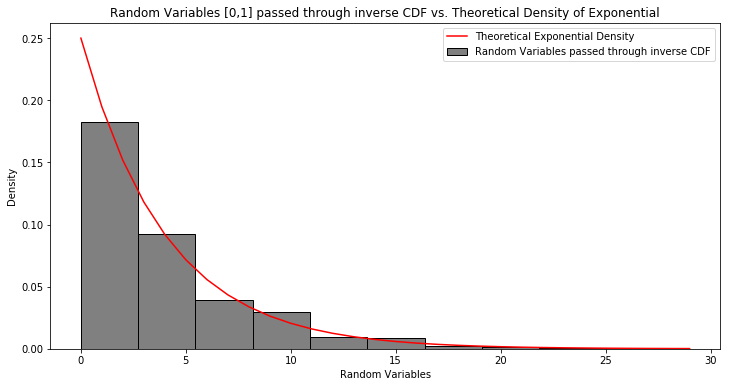

In [13]:
#Initialize a list to hold random variables.
randList=[]
#Create 1000 elements in that list of random decimals from 0 to 1.
for i in range(1000):
    randList.append(np.random.uniform(0,1)) #using random function.
#Now create a list to hold the decimals that have been passed through the inverse CDF
#function that we wrote above.
logList=[]
#For each element in the random list...
for i in range(len(randList)):
    #Append each decimal that has been passed through the function.
    logList.append((np.log(1-randList[i]))/-0.25)
#Now we want to overlay a theoretical exponential. Our x-axis is from 0 to 30, so we set
#the scale from 0 to 30.
overlay=[x for x in range(0,30)]
#Then we run that through the function, using lambda equals to 1/4.
result=[0.25*math.exp(-0.25*x) for x in overlay]
#Then we plot and make our graphs!
fig, ax = plt.subplots(figsize=(12,6))
plt.hist(logList, density=True, color="grey", edgecolor="black", label="Random Variables passed through inverse CDF")
plt.plot(result, color="red", label="Theoretical Exponential Density")
plt.title("Random Variables [0,1] passed through inverse CDF vs. Theoretical Density of Exponential")
plt.ylabel("Density")
plt.xlabel("Random Variables")
ax.legend();

### b) Simulating a new distribution
#### i) Consider a continuous random variable given by $f(x)=\frac{\sin(x)}{2}$ for $x \in [0, \pi]$.  Find the cdf and inverse cdf of X.

**PART B (Solution):**

Let's start by taking the integral of $f(x)$.

$$F(x) = \int_{0}^{x} \frac{sin\left(x\right)}{2}dx $$

We can bring any of our constants out, therefore let's move the $\frac{1}{2}$ to the outside.

$$\frac{1}{2}\cdot \int_{0}^{x} \sin \left(x\right)dx $$

Now integrate. The integral of $sin(x)$ is $-cos(x)$.

$$\frac{1}{2} \cdot -\cos (x)\bigg|_0^x$$

We then evaluate our function frp, $0$ to $x$, and we get...

$$F(x) = \frac{1}{2}\left(-\cos \left(x\right)+1\right) \checkmark$$

Now, onto the inverse CDF! We will swap $x$ and $y$ like we did when we found our inverse CDF for Par A, above.

$$x = -\frac{1}{2}\cos \left(y\right)+\frac{1}{2}$$

Isolate each variable on its own side, and simplify the expression down!

$$ -2x = \cos(y)-1$$

Now we can solve for $y$!

$$y = \cos^{-1}(1-2x) \checkmark$$


#### ii) Simulate draws from X by simluating 1000 $U[0,1]$ random variables and plugging them into the inverse cdf you just found.  As in part a), plot a histogram of the random variables against their density function.

**SOURCES USED**

1 - (Random Uniform in Python) https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.uniform.html

2 - (Stepping a decimal value) https://stackoverflow.com/questions/477486/how-to-use-a-decimal-range-step-value

3 - (Python Math Functions) https://docs.python.org/2/library/math.html

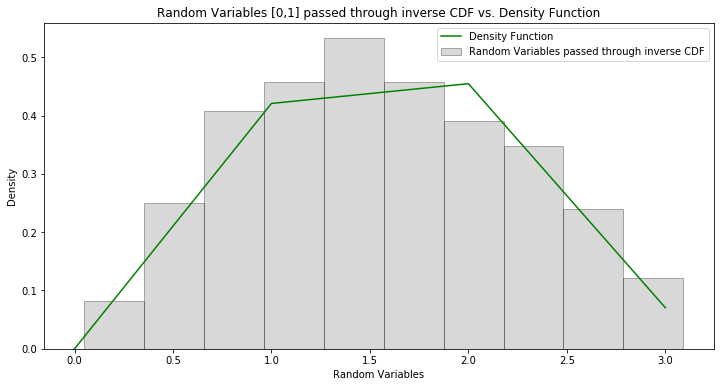

In [20]:
#Just like above, initialize a list to hold 1,000 random variables between 0 and 1.
randList=[]
#Now iterate over 1000 times and fill the list with random variables.
for i in range(1000):
    randList.append(random.uniform(0,1)) #Filling the list.
#New list to hold the values of the first list except passed through NEW inverse CDF.
funcList=[]
#For each element in the random list, apply the function to it.
for i in range(len(randList)):
    #Use the minimum to get rid of any nan's and make it so that arccos has correct range
    #of inputs. From between -1 to 1.
    funcList.append(np.arccos(np.minimum(1,-2*randList[i])+1)) #Append those onto list.
#Now we want to plot the other density function, so we take values from 0 to pi, stepping through.
step=[x for x in np.arange(0,math.pi)]
#The exponential then is just that list passed through the sin(x)/2, our original function.
exp=[np.sin(x)/2 for x in step]
#Finally, we get to plotting and plot everything out!
fig, ax = plt.subplots(figsize=(12,6))
plt.hist(funcList, density=True, color="gray", alpha=0.3, edgecolor="black", label="Random Variables passed through inverse CDF")
plt.plot(exp, color="green", label="Density Function")
plt.title("Random Variables [0,1] passed through inverse CDF vs. Density Function")
plt.ylabel("Density")
plt.xlabel("Random Variables")
ax.legend();

### c) Generalizing

Describe in words how this process might work on a discrete random variable.  You may use the Bernoulli as an example, if you wish.

If we take $x$ that is continuous and has a cumulative distribution function called $f$. Then, a random variable $y=f(x)$ follows a discrete distribution over the following interval $[0,1]$. That means that the inverse transformation sample is the reverse of that process, and that for random variable $y$, we randomly choose a number $n$ that is somewhere in the range from 0 to 1. Then we know that because $f^{-1}(y)$ has the same distribution as $x$, then that means that the function $x = f^{-1}(u)$ can be looked at as the random sample from the distribution of $f$.